In [5]:
import shapefile
from shapely.geometry import shape, Point, mapping
import numpy as np
import pandas as pd

base = "../../data/"
filename = "raw/2016_LGA_SHAPE/LGA_2016_AUST"

sf = shapefile.Reader(base+filename)

centroids = list(map(lambda x: shape(x.__geo_interface__).centroid, sf.shapes()[:130]))

df = pd.DataFrame(sf.records())
nswdf = df[df[4] =="New South Wales"]
# drop "No usual address" - not a useful LGA
nswdf = nswdf[nswdf[0] != "LGA19499"]
nswdf.columns = ["code", "codenum", "name", "unknown", "state", "unknown2"]
nswdf["clean_name"] = nswdf["name"].str.extract('([^\\(]*)', expand=False).str.strip()
nswdf['long'] = np.asarray([x.x for x in centroids])
nswdf['lat'] = np.asarray([x.y for x in centroids])
nswdf

,code,codenum,name,unknown,state,unknown2,clean_name,long,lat
0,LGA10050,10050,Albury (C),1,New South Wales,305.9459,Albury,146.970424,-36.026604
1,LGA10130,10130,Armidale Regional (A),1,New South Wales,8620.6990,Armidale Regional,151.829150,-30.336349
2,LGA10250,10250,Ballina (A),1,New South Wales,484.9389,Ballina,153.486147,-28.852885
3,LGA10300,10300,Balranald (A),1,New South Wales,21690.6753,Balranald,143.611623,-33.950350
4,LGA10470,10470,Bathurst Regional (A),1,New South Wales,3817.8646,Bathurst Regional,149.525634,-33.430139
5,LGA10550,10550,Bega Valley (A),1,New South Wales,6278.8811,Bega Valley,149.717569,-36.825941
6,LGA10600,10600,Bellingen (A),1,New South Wales,1600.4337,Bellingen,152.728589,-30.403803
7,LGA10650,10650,Berrigan (A),1,New South Wales,2065.7759,Berrigan,145.711213,-35.734325
8,LGA10750,10750,Blacktown (C),1,New South Wales,240.0487,Blacktown,150.864351,-33.741329
9,LGA10800,10800,Bland (A),1,New South Wales,8557.6535,Bland,146.961268,-33.894344


In [6]:
#average distance between nearest neighbours
dist = []
for i in centroids:
    alldist = []
    for j in centroids:
        if i != j:
            alldist.append(i.distance(j))
    dist.append(np.min(alldist))
    
np.mean(dist)

0.46813379855385656

In [9]:
target = pd.read_csv(base+"processed/cleaned_log_target.csv")

In [10]:
target= target[target['Type']== 'Rate per 100,000 population']
target

,Unnamed: 0,code,codenum,name,unknown,state,unknown2,clean_name,long,lat,...,Offensive conduct,Offensive language,Liquor offences,Breach AVO,Breach bail conditions,Resist or hinder officer,Transport regulatory offences,LGA,pop,pop_class
1,1,LGA10050,10050,Albury (C),1,New South Wales,305.9459,Albury,146.970424,-36.026604,...,5.716530,4.860480,5.964207,5.545905,6.943760,5.003580,2.988677,Albury,52165.003785,3.0
4,4,LGA10050,10050,Albury (C),1,New South Wales,305.9459,Albury,146.970424,-36.026604,...,5.364281,4.800067,5.826225,5.871430,6.620968,5.161569,3.380984,Albury,52165.003785,3.0
7,7,LGA10050,10050,Albury (C),1,New South Wales,305.9459,Albury,146.970424,-36.026604,...,5.248070,4.723546,5.288076,5.833587,6.666990,5.069822,3.371154,Albury,52165.003785,3.0
10,10,LGA10050,10050,Albury (C),1,New South Wales,305.9459,Albury,146.970424,-36.026604,...,4.981492,4.177119,5.454780,5.892505,6.916060,5.105106,2.596672,Albury,52165.003785,3.0
13,13,LGA10050,10050,Albury (C),1,New South Wales,305.9459,Albury,146.970424,-36.026604,...,4.913438,3.828813,5.139395,5.908254,7.211789,4.825146,3.483972,Albury,52165.003785,3.0
16,16,LGA10130,10130,Armidale Regional (A),1,New South Wales,8620.6990,Armidale Regional,151.829150,-30.336349,...,5.610925,4.988396,6.032520,5.758083,5.646858,4.941876,2.995967,Armidale Regional,30311.000839,2.0
19,19,LGA10130,10130,Armidale Regional (A),1,New South Wales,8620.6990,Armidale Regional,151.829150,-30.336349,...,5.294823,4.755827,5.743774,5.390134,5.531212,5.112502,1.200477,Armidale Regional,30311.000839,2.0
22,22,LGA10130,10130,Armidale Regional (A),1,New South Wales,8620.6990,Armidale Regional,151.829150,-30.336349,...,5.167058,4.693273,5.500831,5.430872,5.685402,4.662502,1.196767,Armidale Regional,30311.000839,2.0
25,25,LGA10130,10130,Armidale Regional (A),1,New South Wales,8620.6990,Armidale Regional,151.829150,-30.336349,...,5.200993,3.832718,4.931329,5.182643,5.600379,4.329153,2.579952,Armidale Regional,30311.000839,2.0
28,28,LGA10130,10130,Armidale Regional (A),1,New South Wales,8620.6990,Armidale Regional,151.829150,-30.336349,...,5.125485,4.238182,5.144903,5.236711,5.336794,3.758608,2.579952,Armidale Regional,30311.000839,2.0


In [33]:
# impute with 1, 0 is bad for log
nswdf_target = pd.merge(nswdf, target, left_on='clean_name', right_on='LGA')

nswdf_target = nswdf_target.fillna(value=0.1)
# log it
start_col = nswdf_target.columns.get_loc('Assault - domestic violence')
for i in range(27):
    nswdf_target = nswdf_target.replace(0.0, 0.1)
    nswdf_target.iloc[:,start_col+i] = np.log(nswdf_target.iloc[:,start_col+i])
nswdf_target

,code,codenum,name,unknown,state,unknown2,clean_name,long,lat,Year,...,Possession use of cannabis,Prohibited weapons offences,Trespass,Offensive conduct,Offensive language,Liquor offences,Breach AVO,Breach bail conditions,Resist or hinder officer,Transport regulatory offences
0,LGA10050,10050,Albury (C),1,New South Wales,305.9459,Albury,146.970424,-36.026604,2013,...,5.092811,5.538123,5.340053,5.716530,4.860480,5.964207,5.545905,6.943760,5.003580,2.988677
1,LGA10050,10050,Albury (C),1,New South Wales,305.9459,Albury,146.970424,-36.026604,2014,...,5.663366,5.893289,5.278103,5.364281,4.800067,5.826225,5.871430,6.620968,5.161569,3.380984
2,LGA10050,10050,Albury (C),1,New South Wales,305.9459,Albury,146.970424,-36.026604,2015,...,5.894212,5.793002,5.195703,5.248070,4.723546,5.288076,5.833587,6.666990,5.069822,3.371154
3,LGA10050,10050,Albury (C),1,New South Wales,305.9459,Albury,146.970424,-36.026604,2016,...,6.039830,5.756704,5.116667,4.981492,4.177119,5.454780,5.892505,6.916060,5.105106,2.596672
4,LGA10050,10050,Albury (C),1,New South Wales,305.9459,Albury,146.970424,-36.026604,2017,...,5.471040,5.620572,5.255929,4.913438,3.828813,5.139395,5.908254,7.211789,4.825146,3.483972
5,LGA10130,10130,Armidale Regional (A),1,New South Wales,8620.6990,Armidale Regional,151.829150,-30.336349,2013,...,6.024488,5.010869,5.423714,5.610925,4.988396,6.032520,5.758083,5.646858,4.941876,2.995967
6,LGA10130,10130,Armidale Regional (A),1,New South Wales,8620.6990,Armidale Regional,151.829150,-30.336349,2014,...,6.170292,5.463159,5.825452,5.294823,4.755827,5.743774,5.390134,5.531212,5.112502,1.200477
7,LGA10130,10130,Armidale Regional (A),1,New South Wales,8620.6990,Armidale Regional,151.829150,-30.336349,2015,...,6.145525,5.500831,6.227203,5.167058,4.693273,5.500831,5.430872,5.685402,4.662502,1.196767
8,LGA10130,10130,Armidale Regional (A),1,New South Wales,8620.6990,Armidale Regional,151.829150,-30.336349,2016,...,6.471774,5.659568,6.210939,5.200993,3.832718,4.931329,5.182643,5.600379,4.329153,2.579952
9,LGA10130,10130,Armidale Regional (A),1,New South Wales,8620.6990,Armidale Regional,151.829150,-30.336349,2017,...,5.747536,5.747536,6.021973,5.125485,4.238182,5.144903,5.236711,5.336794,3.758608,2.579952


In [41]:
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KernelDensity
from sklearn.cross_validation import LeaveOneOut
from sklearn.metrics import mean_squared_error, make_scorer
import numpy as np

bandwidths = np.linspace(0.01, 0.5, 100)

# 27 models for 27 crimes
best_bw = []
for i in range(2):
    #crime index - index of first crime column
    start_col = nswdf_target.columns.get_loc('Assault - domestic violence')
    
    grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                        {'bandwidth': bandwidths},
                        cv=LeaveOneOut(len(nswdf)))
    grid.fit(nswdf_target.loc[:, ['lat','long', nswdf_target.columns[start_col+i]]])
    best_bw.append((grid.best_params_, grid.best_score_))

In [47]:
grid.best_params_

{'bandwidth': 0.059494949494949496}

In [85]:
nswdf_target.loc[:, ['lat','long', nswdf_target.columns[start_col+i]]].describe()

,lat,long,Assault - non-domestic violence
count,625.000000,625.000000,625.000000
mean,-32.976853,149.650631,5.455726
std,1.946970,2.473787,2.053850
min,-36.825941,141.479266,-2.302585
25%,-34.083345,148.065556,5.459039
50%,-33.697544,150.630295,5.943089
75%,-31.619027,151.202739,6.348186
max,-28.360000,153.486147,7.511192


KernelDensity(algorithm='auto', atol=0, bandwidth=0.059494949494949496,
       breadth_first=True, kernel='gaussian', leaf_size=40,
       metric='euclidean', metric_params=None, rtol=0)

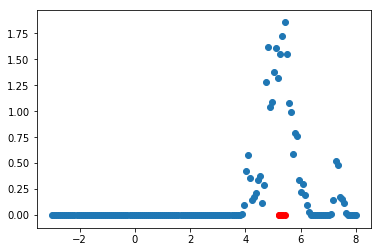

In [89]:
from matplotlib import pyplot as plt
%matplotlib inline

def plot_marginal(lga, crimetype):
    #todo, plug in CV bandwidths for each crimetype
    model = KernelDensity(kernel='gaussian', bandwidth=grid.best_params_['bandwidth'])
    loo_row_indexer = nswdf_target['clean_name']!=lga
    model.fit(nswdf_target.loc[loo_row_indexer, ['lat','long', nswdf_target.columns[start_col+i]]])
    lga_loc = nswdf_target.loc[nswdf_target['clean_name']==lga, ['lat', 'long']].iloc[0]

    #cv data
    #TODO actually get metrics for given crime, this is hard coded to Assault non domestic
    crimerange = np.linspace(-3, 8, 150)
    df  = pd.DataFrame(crimerange)
    df['lat'] = lga_loc['lat']
    df['long'] = lga_loc['long']
    df = df[['lat','long', 0]]
    density = np.exp(model.score_samples(df))

    plt.scatter(x=crimerange, y=density)
    plt.scatter(x=nswdf_target.loc[nswdf_target['clean_name']==lga, crimetype], y=np.zeros(5), color='red')
    
plot_marginal('Willoughby', 'Assault - non-domestic violence')

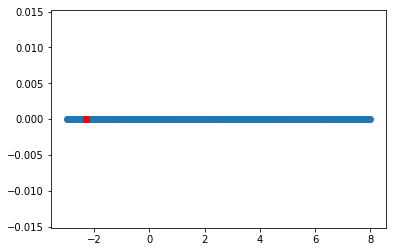

In [90]:
plot_marginal('Bogan', 'Assault - non-domestic violence')

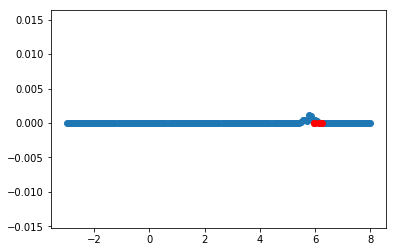

In [91]:
plot_marginal('Wollongong', 'Assault - non-domestic violence')

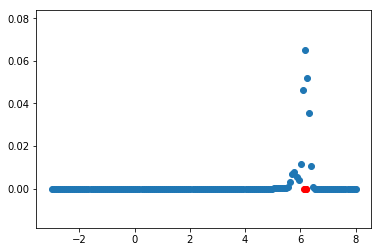

In [92]:
plot_marginal('Penrith', 'Assault - non-domestic violence')